# Build s simple Neurol Network for Text Classification

In [6]:
!apt-get install -y unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [7]:
%cd /content/Data

/content/Data


## Extract the data

In [8]:
!unrar x Train_Full.rar
!unrar x Test_Full.rar

Streaming output truncated to the last 5000 lines.
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6148).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6210).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6079).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6083).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6086).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6088).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6312).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6092).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6094).txt                        89%  OK 
Extracting  Test_Full/Van hoa/VH_VNE_T_ (6101).txt                        89%  OK 
Extracting  Test_Full/Van hoa

## 1. Import libraries

In [9]:
import os
import glob
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## 2. Load the dataset

In [10]:
def load_texts_from_folder(folder):
    texts = []
    labels = []
    for label_name in os.listdir(folder):  # e.g., "Chinh tri Xa hoi"
        subfolder = os.path.join(folder, label_name)
        if os.path.isdir(subfolder):
            for file in glob.glob(os.path.join(subfolder, "*.txt")):
                try:
                    # Thử UTF-8 trước
                    with open(file, encoding="utf-8-sig") as f:
                        texts.append(f.read())
                except UnicodeDecodeError:
                    try:
                        # Nếu fail thì thử UTF-16
                        with open(file, encoding="utf-16") as f:
                            texts.append(f.read())
                    except:
                        # Cuối cùng fallback sang latin1
                        with open(file, encoding="latin1") as f:
                            texts.append(f.read())
                labels.append(label_name)
    return texts, labels


train_texts, train_labels = load_texts_from_folder("/content/Data/Train_Full")
test_texts, test_labels = load_texts_from_folder("/content/Data/Test_Full")

print("Sample text:", train_texts[0][:200])
print("Label:", train_labels[0])

Sample text: Mặc dù khung giá hơn 1.000 loại hình dịch vụ kỹ thuật y tế đã được ban hành nhưng đến thời điểm này, phần lớn các kỹ thuật trên vẫn chưa được BHYT chi trả. Trả lời về nguyên nhân của tình trạng này, ô
Label: Chinh tri Xa hoi


## 3. Encode labels

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_labels)
y_test = label_encoder.transform(test_labels)


## 4. Tokenize and pad text

In [12]:
# Tokenizer
vocab_size = 20000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

X_train = tokenizer.texts_to_sequences(train_texts)
X_train = pad_sequences(X_train, maxlen=max_len, padding='post')

X_test = tokenizer.texts_to_sequences(test_texts)
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

## 5. Build a simple neural network

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 6. Train model

In [14]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=32
)

Epoch 1/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.5469 - loss: 1.3979 - val_accuracy: 0.8523 - val_loss: 0.4639
Epoch 2/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - accuracy: 0.8739 - loss: 0.3919 - val_accuracy: 0.8700 - val_loss: 0.3998
Epoch 3/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.9063 - loss: 0.2913 - val_accuracy: 0.8741 - val_loss: 0.3857
Epoch 4/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.9285 - loss: 0.2277 - val_accuracy: 0.8762 - val_loss: 0.3818
Epoch 5/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.9427 - loss: 0.1835 - val_accuracy: 0.8774 - val_loss: 0.3921


In [15]:
loss, acc = model.evaluate(X_test, y_test,verbose = 0)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {acc:.4f}")

Test loss: 0.3921
Test accuracy: 0.8774


## Visualization

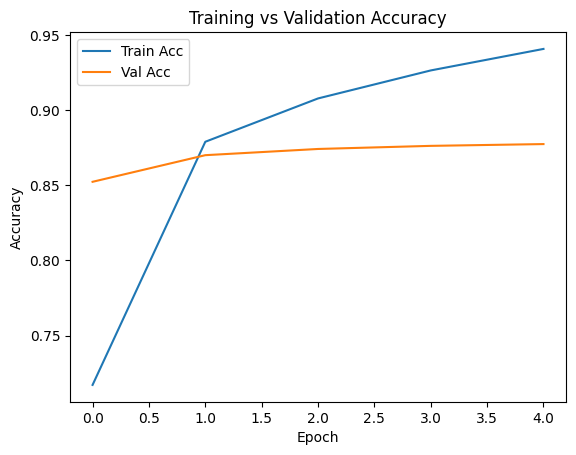

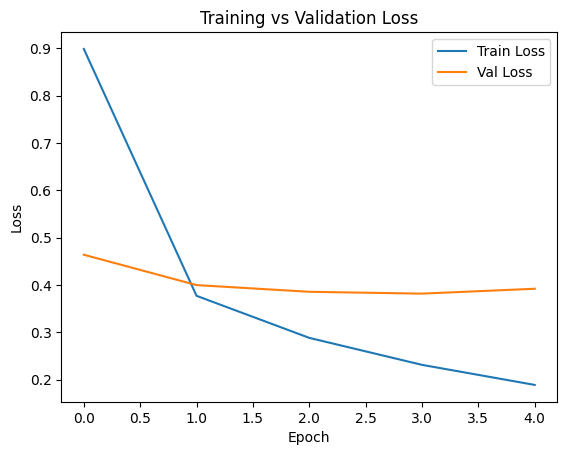

In [16]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()


In [17]:
def predict_text(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(padded)
    label_idx = pred.argmax(axis=1)[0]
    return label_encoder.classes_[label_idx]

sample_text = "Giá dầu thô thế giới tăng mạnh trong ngày hôm nay."
print("Prediction:", predict_text(sample_text))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Prediction: Chinh tri Xa hoi


In [18]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


1575/1575 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
                  precision    recall  f1-score   support

Chinh tri Xa hoi       0.80      0.85      0.82      7567
        Doi song       0.65      0.52      0.58      2036
        Khoa hoc       0.77      0.70      0.74      2096
      Kinh doanh       0.89      0.83      0.86      5276
       Phap luat       0.82      0.90      0.86      3788
        Suc khoe       0.91      0.91      0.91      5417
        The gioi       0.93      0.90      0.91      6716
        The thao       0.98      0.97      0.97      6667
         Van hoa       0.88      0.92      0.90      6250
         Vi tinh       0.90      0.93      0.92      4560

        accuracy                           0.88     50373
       macro avg       0.85      0.84      0.85     50373
    weighted avg       0.88      0.88      0.88     50373



# Implementing Gradient Descent from Scratch

## Using a Randomly Generated Dataset

In [19]:
import numpy as np
import pandas as pd

# --- 1. Tạo dataset giả ---
# 100 điểm lớp 0 - N(2,2), 100 điểm lớp 1 - N(4,4)
np.random.seed(42)
X0 = np.random.randn(100, 2) + np.array([2, 2])
X1 = np.random.randn(100, 2) + np.array([4, 4])
X = np.vstack([X0, X1])
y = np.array([0]*100 + [1]*100).reshape(-1,1)

# Chuẩn hóa dữ liệu (optional)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Thêm cột bias
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # shape (200, 3)

# --- 2. Khởi tạo tham số ---
w = np.random.randn(X_b.shape[1], 1)

# --- 3. Các hàm hỗ trợ ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y_true, y_pred):
    eps = 1e-9
    return -np.mean(y_true*np.log(y_pred+eps) + (1-y_true)*np.log(1-y_pred+eps))

# --- 4. Gradient Descent ---
lr = 0.1
epochs = 1000

for epoch in range(epochs):
    z = X_b.dot(w)
    y_pred = sigmoid(z)
    grad = X_b.T.dot(y_pred - y) / len(y)
    w -= lr * grad

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss = {loss(y, y_pred):.4f}")

# --- 5. Dự đoán ---
preds = (sigmoid(X_b.dot(w)) > 0.5).astype(int)
acc = (preds == y).mean()
print("Accuracy:", acc)


Epoch 0, Loss = 1.2338
Epoch 100, Loss = 0.2254
Epoch 200, Loss = 0.1844
Epoch 300, Loss = 0.1715
Epoch 400, Loss = 0.1653
Epoch 500, Loss = 0.1617
Epoch 600, Loss = 0.1595
Epoch 700, Loss = 0.1580
Epoch 800, Loss = 0.1569
Epoch 900, Loss = 0.1562
Accuracy: 0.93


## Applying to the Vietnamese Text Dataset

In [20]:
# gradient_descent_text_classification.py
import os, glob, re
import numpy as np
from collections import Counter, defaultdict
import math
import random

# --------------------------
# 1) Load texts
# --------------------------
def load_texts_from_folder(folder):
    texts = []
    labels = []
    for label_name in os.listdir(folder):
        subfolder = os.path.join(folder, label_name)
        if os.path.isdir(subfolder):
            for file in glob.glob(os.path.join(subfolder, "*.txt")):
                try:
                    with open(file, encoding="utf-8-sig") as f:
                        texts.append(f.read())
                except UnicodeDecodeError:
                    try:
                        with open(file, encoding="utf-16") as f:
                            texts.append(f.read())
                    except:
                        with open(file, encoding="latin1") as f:
                            texts.append(f.read())
                labels.append(label_name)
    return texts, labels

In [21]:
# --------------------------
# 2) Simple preprocessing + tokenizer
# --------------------------
TOKEN_RE = re.compile(r"\w+", flags=re.UNICODE)

def tokenize(text):
    # lowercase, extract word tokens (letters/numbers/underscore)
    return TOKEN_RE.findall(text.lower())

# --------------------------
# 3) Build vocabulary (top K frequent tokens across corpus)
# --------------------------
def build_vocabulary(docs_tokens, max_features=5000, min_freq=2):
    freq = Counter()
    df = Counter()
    for tokens in docs_tokens:
        freq.update(tokens)
        df.update(set(tokens))
    # keep tokens with min_freq and top max_features by freq
    candidates = [w for w, c in freq.items() if c >= min_freq]
    candidates.sort(key=lambda w: freq[w], reverse=True)
    vocab_tokens = candidates[:max_features]
    vocab = {tok:i for i,tok in enumerate(vocab_tokens)}
    return vocab, freq, df

In [22]:
# --------------------------
# 4) Make document-term matrix (counts)
# --------------------------
def docs_to_count_matrix(docs_tokens, vocab):
    N = len(docs_tokens)
    V = len(vocab)
    X = np.zeros((N, V), dtype=np.float64)
    for i, tokens in enumerate(docs_tokens):
        for t in tokens:
            if t in vocab:
                X[i, vocab[t]] += 1.0
    return X

In [23]:

# --------------------------
# 5) TF-IDF transform (manual)
# --------------------------
def tfidf_transform(count_matrix, df_counts, N_docs):
    # count_matrix: (N, V)
    # df_counts: dict token->doc_freq
    # produce TF-IDF normalized (L2)
    N, V = count_matrix.shape
    # compute idf vector aligned with columns
    # note: need mapping of column index -> token doc freq
    # We'll require df_counts as array of length V provided by caller.
    # Caller should prepare df_array accordingly.
    raise NotImplementedError("Use compute_tfidf_with_df to supply df array")

def compute_tfidf_with_df(count_matrix, df_array, smooth_idf=True):
    N, V = count_matrix.shape
    # TF: raw counts -> term frequency (option: use raw counts or normalized)
    # use raw counts normalized by doc length to get tf
    doc_lengths = count_matrix.sum(axis=1, keepdims=True)
    # avoid division by zero
    doc_lengths[doc_lengths == 0] = 1.0
    tf = count_matrix / doc_lengths  # shape (N,V)
    # IDF:
    if smooth_idf:
        idf = np.log((1 + N) / (1 + df_array)) + 1.0  # shape (V,)
    else:
        idf = np.log(N / (df_array + 1e-9))
    tfidf = tf * idf  # broadcasting
    # L2 normalize each row
    norms = np.linalg.norm(tfidf, axis=1, keepdims=True)
    norms[norms == 0] = 1.0
    tfidf = tfidf / norms
    return tfidf

# --------------------------
# 6) Encode labels -> integers
# --------------------------
def encode_labels(labels):
    unique = sorted(list(set(labels)))
    label2idx = {lab:i for i,lab in enumerate(unique)}
    y = np.array([label2idx[l] for l in labels], dtype=np.int64)
    return y, label2idx

# --------------------------
# 7) Train/test split (manual)
# --------------------------
def train_test_split_indices(n_samples, test_size=0.2, random_state=42):
    rng = random.Random(random_state)
    idx = list(range(n_samples))
    rng.shuffle(idx)
    n_test = int(n_samples * test_size)
    test_idx = idx[:n_test]
    train_idx = idx[n_test:]
    return train_idx, test_idx

In [24]:

# --------------------------
# 8) Softmax, loss, gradients (multiclass)
# --------------------------
def softmax(z):
    # z: (N, C)
    z_max = np.max(z, axis=1, keepdims=True)
    exp = np.exp(z - z_max)
    probs = exp / np.sum(exp, axis=1, keepdims=True)
    return probs

def cross_entropy_loss(probs, y_true_onehot, W, l2=0.0):
    # probs: (N,C), y_true_onehot: (N,C)
    N = probs.shape[0]
    # clip for stability
    eps = 1e-12
    logp = np.log(np.clip(probs, eps, 1.0))
    loss = -np.sum(y_true_onehot * logp) / N
    # L2 reg (exclude bias if bias separate)
    loss += 0.5 * l2 * np.sum(W * W)
    return loss

# --------------------------
# 9) Train logistic regression with gradient descent (batch)
# --------------------------
def train_softmax_gd(X_train, y_train, X_val=None, y_val=None,
                     lr=0.5, epochs=100, l2=1e-4, verbose=True):
    # X_train: (N, D), y_train: (N,)
    N, D = X_train.shape
    classes = np.unique(y_train)
    C = len(classes)
    # initialize W, b
    rng = np.random.RandomState(123)
    W = rng.normal(scale=0.01, size=(D, C))
    b = np.zeros((1, C))
    # prepare one-hot
    Y_one = np.zeros((N, C))
    for i, lab in enumerate(y_train):
        Y_one[i, lab] = 1.0

    history = {"train_loss":[], "train_acc":[], "val_loss":[], "val_acc":[]}

    for epoch in range(1, epochs+1):
        # forward
        logits = X_train.dot(W) + b  # (N,C)
        probs = softmax(logits)
        loss = cross_entropy_loss(probs, Y_one, W, l2=l2)

        # accuracy
        preds = np.argmax(probs, axis=1)
        acc = np.mean(preds == y_train)

        # gradient
        grad_logits = (probs - Y_one) / N  # (N,C)
        gradW = X_train.T.dot(grad_logits) + l2 * W  # (D,C)
        gradb = np.sum(grad_logits, axis=0, keepdims=True)  # (1,C)

        # update
        W -= lr * gradW
        b -= lr * gradb

        history["train_loss"].append(loss)
        history["train_acc"].append(acc)

        # validation
        if X_val is not None and y_val is not None:
            logits_val = X_val.dot(W) + b
            probs_val = softmax(logits_val)
            # y_val one-hot
            Nval = y_val.shape[0]
            Yv_one = np.zeros((Nval, C))
            for i, lab in enumerate(y_val):
                Yv_one[i, lab] = 1.0
            vloss = cross_entropy_loss(probs_val, Yv_one, W, l2=l2)
            vpreds = np.argmax(probs_val, axis=1)
            vacc = np.mean(vpreds == y_val)
            history["val_loss"].append(vloss)
            history["val_acc"].append(vacc)
            if verbose and epoch % max(1, epochs//10) == 0:
                print(f"Epoch {epoch}/{epochs} - loss: {loss:.4f} acc: {acc:.4f} | val_loss: {vloss:.4f} val_acc: {vacc:.4f}")
        else:
            if verbose and epoch % max(1, epochs//10) == 0:
                print(f"Epoch {epoch}/{epochs} - loss: {loss:.4f} acc: {acc:.4f}")

    return W, b, history

# --------------------------
# 10) Evaluate
# --------------------------
def evaluate(X, y, W, b):
    logits = X.dot(W) + b
    probs = softmax(logits)
    preds = np.argmax(probs, axis=1)
    acc = np.mean(preds == y)
    return acc, preds, probs

In [25]:

# --------------------------
# 11) Put all together: pipeline function
# --------------------------
def pipeline_train_from_folder(folder_path,
                               max_features=5000,
                               min_freq=2,
                               test_size=0.2,
                               random_state=42,
                               lr=1.0,
                               epochs=200,
                               l2=1e-4):
    print("Loading texts...")
    texts, labels = load_texts_from_folder(folder_path)
    print(f"Loaded {len(texts)} documents from {len(set(labels))} classes.")

    # tokenize
    docs_tokens = [tokenize(t) for t in texts]

    # build vocab
    print("Building vocabulary...")
    vocab, freq, df = build_vocabulary(docs_tokens, max_features=max_features, min_freq=min_freq)
    V = len(vocab)
    print(f"Vocab size = {V}")

    # count matrix
    print("Building count matrix...")
    X_counts = docs_to_count_matrix(docs_tokens, vocab)  # (N,V)
    N = X_counts.shape[0]

    # prepare df array aligned with vocab indices
    # map index -> token by reversing vocab
    idx2tok = {i:t for t,i in vocab.items()}
    df_array = np.zeros(V, dtype=np.int64)
    for i in range(V):
        tok = idx2tok[i]
        df_array[i] = df.get(tok, 0)

    # TF-IDF
    print("Compute TF-IDF...")
    X_tfidf = X_tfidf = compute_tfidf_with_df(X_counts, df_array, N)

    # encode labels
    y, label2idx = encode_labels(labels)
    print("Labels:", label2idx)

    # split
    train_idx, test_idx = train_test_split_indices(N, test_size=test_size, random_state=random_state)
    X_train = X_tfidf[train_idx]
    X_test = X_tfidf[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]
    print(f"Train: {X_train.shape[0]} docs, Test: {X_test.shape[0]} docs")

    # train model
    print("Training softmax (multiclass logistic) with batch gradient descent...")
    W, b, history = train_softmax_gd(X_train, y_train, X_val=X_test, y_val=y_test,
                                     lr=lr, epochs=epochs, l2=l2, verbose=True)

    # final evaluation
    train_acc, _, _ = evaluate(X_train, y_train, W, b)
    test_acc, preds, probs = evaluate(X_test, y_test, W, b)
    print(f"Final Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

    return {
        "W":W, "b":b, "history":history,
        "vocab":vocab, "label2idx":label2idx,
        "X_train":X_train, "X_test":X_test, "y_train":y_train, "y_test":y_test
    }

# --------------------------
# 12) Run Demo
# --------------------------
if __name__ == "__main__":
    DATA_FOLDER = "/content/Data/Test_Full"
    result = pipeline_train_from_folder(
        DATA_FOLDER,
        max_features=4000,
        min_freq=2,
        test_size=0.2,
        random_state=42,
        lr=0.5,
        epochs=200,
        l2=1e-4
    )

Loading texts...
Loaded 50373 documents from 10 classes.
Building vocabulary...
Vocab size = 4000
Building count matrix...
Compute TF-IDF...
Labels: {'Chinh tri Xa hoi': 0, 'Doi song': 1, 'Khoa hoc': 2, 'Kinh doanh': 3, 'Phap luat': 4, 'Suc khoe': 5, 'The gioi': 6, 'The thao': 7, 'Van hoa': 8, 'Vi tinh': 9}
Train: 40299 docs, Test: 10074 docs
Training softmax (multiclass logistic) with batch gradient descent...
Epoch 20/200 - loss: 2.1950 acc: 0.2314 | val_loss: 2.1857 val_acc: 0.2319
Epoch 40/200 - loss: 2.1357 acc: 0.3355 | val_loss: 2.1245 val_acc: 0.3424
Epoch 60/200 - loss: 2.0854 acc: 0.4177 | val_loss: 2.0728 val_acc: 0.4291
Epoch 80/200 - loss: 2.0382 acc: 0.4674 | val_loss: 2.0246 val_acc: 0.4763
Epoch 100/200 - loss: 1.9930 acc: 0.5166 | val_loss: 1.9787 val_acc: 0.5296
Epoch 120/200 - loss: 1.9495 acc: 0.5633 | val_loss: 1.9347 val_acc: 0.5761
Epoch 140/200 - loss: 1.9076 acc: 0.6022 | val_loss: 1.8924 val_acc: 0.6127
Epoch 160/200 - loss: 1.8674 acc: 0.6310 | val_loss: 1.85